Nhập thư viện

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Nhập dữ liệu

In [2]:
data_path = '../Data/universities.csv'
df = pd.read_csv(data_path)

Kiểm thử dữ liệu nhập

In [3]:
df.info()
df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Institution Name                1200 non-null   object 
 1   Region                          1200 non-null   object 
 2   Country                         1200 non-null   object 
 3   Overall                         602 non-null    float64
 4   Academic Reputation             1200 non-null   float64
 5   Employer Reputation             1200 non-null   float64
 6   Faculty Student Ratio           1199 non-null   float64
 7   Citations Per Faculty           1200 non-null   float64
 8   International Faculty Ratio     1143 non-null   float64
 9   International Students Ratio    1175 non-null   float64
 10  International Research Network  1197 non-null   float64
 11  Employment Outcomes             1199 non-null   float64
 12  Sustainability                  11

,Institution Name,Region,Country,Overall,Academic Reputation,Employer Reputation,Faculty Student Ratio,Citations Per Faculty,International Faculty Ratio,International Students Ratio,International Research Network,Employment Outcomes,Sustainability
0,Massachusetts Institute of Technology (MIT),North America,United States,100.0,100.0,100.0,100.0,100.0,100.0,88.2,94.3,100.0,95.2
1,University of Cambridge,Europe,United Kingdom,99.2,100.0,100.0,100.0,92.3,100.0,95.8,99.9,100.0,97.3
2,University of Oxford,Europe,United Kingdom,98.9,100.0,100.0,100.0,90.6,98.2,98.2,100.0,100.0,97.8
3,Harvard University,North America,United States,98.3,100.0,100.0,98.3,100.0,84.6,66.8,100.0,100.0,96.7
4,Stanford University,North America,United States,98.1,100.0,100.0,100.0,99.9,99.9,51.2,95.8,100.0,94.4
5,Imperial College London,Europe,United Kingdom,97.8,98.3,99.4,98.5,94.0,100.0,100.0,96.7,83.0,94.4
6,ETH Zurich,Europe,Switzerland,93.3,98.8,83.6,72.1,98.9,100.0,98.5,96.0,79.1,88.4
7,National University of Singapore (NUS),Asia,Singapore,92.7,99.4,88.6,76.5,93.2,100.0,81.9,76.3,100.0,88.1
8,UCL,Europe,United Kingdom,92.4,99.5,97.9,98.4,74.3,99.1,100.0,100.0,51.6,92.5
9,"University of California, Berkeley (UCB)",North America,United States,90.4,100.0,100.0,20.5,99.9,92.2,63.9,92.4,98.7,100.0


Tiền xử lí dữ liệu

In [4]:
# Save columns' names
column_names = df.keys()

# Preprocess data
for column in column_names:
    if column == 'Overall' or df.dtypes[column] == 'object':
        continue
    df[column] = df[column].fillna(df[column].median())

Biểu diện dữ liệu sau khi tiền xử lí

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Institution Name                1200 non-null   object 
 1   Region                          1200 non-null   object 
 2   Country                         1200 non-null   object 
 3   Overall                         602 non-null    float64
 4   Academic Reputation             1200 non-null   float64
 5   Employer Reputation             1200 non-null   float64
 6   Faculty Student Ratio           1200 non-null   float64
 7   Citations Per Faculty           1200 non-null   float64
 8   International Faculty Ratio     1200 non-null   float64
 9   International Students Ratio    1200 non-null   float64
 10  International Research Network  1200 non-null   float64
 11  Employment Outcomes             1200 non-null   float64
 12  Sustainability                  12

Câu hỏi: Yếu tố nào tác động đến chất lượng của giảng viên? Tại sao? Chất lượng của giảng viên ảnh hưởng đến danh tiếng học thuật và mức độ cam kết và thành công của trường như thế nào?

Để trả lời những câu hỏi trên, đầu tiên, chúng ta cần phải xác định yếu tố ảnh hưởng đến chất lượng giảng viên.
Và những yếu tố quyết định chính là: Tỉ lệ Giảng viên-Sinh viên (Faculty Student Ratio) và Lượng trích dẫn của mỗi giảng viên (Citations Per Faculty).

Mối quan hệ giữa Tỉ lệ Giảng viên-Sinh viên và Lượng trích dẫn của mỗi giảng viên:

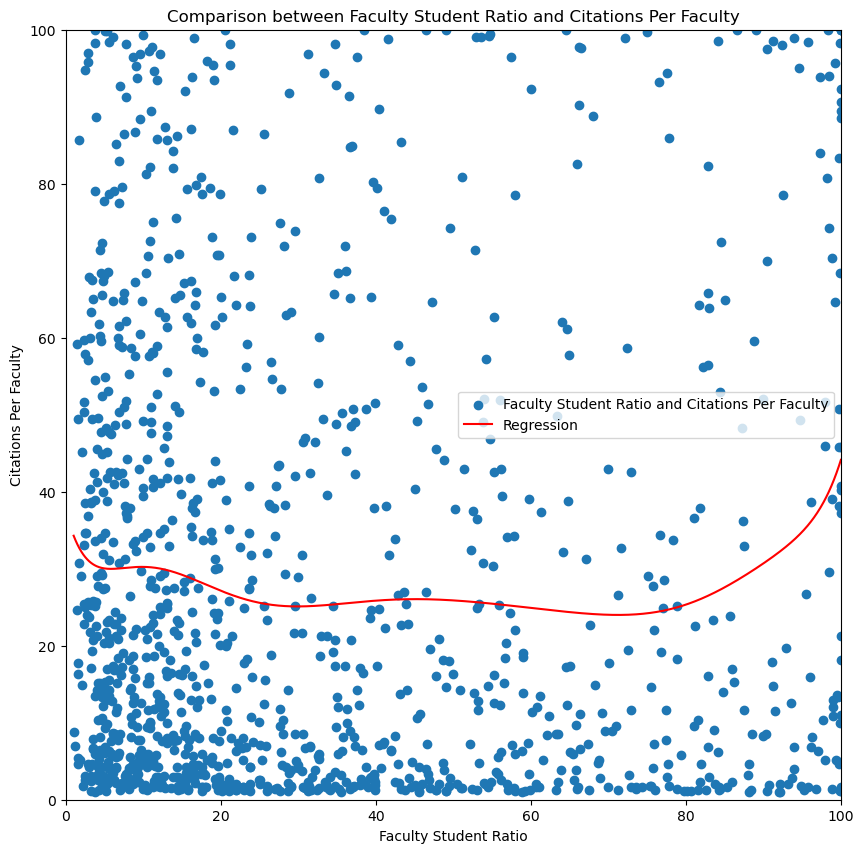

In [6]:
def draw_scatter_plot(data_x, data_y, x_label, y_label, x_lim, y_lim, title, label, degr):
    fig = plt.figure(figsize=(10, 10))
    plt.scatter(data_x, data_y, label=label)
    model = np.poly1d(np.polyfit(data_x, data_y, degr))
    polyline = np.linspace(1, 100, 1200)
    plt.plot(polyline, model(polyline), color='red', label='Regression')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.xlim([0, x_lim])
    plt.ylim([0, y_lim])
    plt.legend()
    plt.show()
    
x = 'Faculty Student Ratio'
y = 'Citations Per Faculty'
draw_scatter_plot(df[x], df[y], x, y, 100, 100, 'Comparison between ' + x + ' and ' + y, x + ' and ' + y, 10)

Như chúng ta có thể thấy, lượng trích dẫn trung bình mỗi giảng viên là cao hơn bình thường (khoảng gần hoặc hơn 30 điểm) trong khi tỉ lệ Giảng viên-Sinh viên đang ở mức thấp (khoảng dưới 20 điểm). Điều này cho ta thấy giảng viên trường này có những nghiên cứu đáng kể nhưng họ không chịu được áp lực từ việc giảng dạy nhiều sinh viên, đây là một điểm trừ cho việc quyết định chất lượng giảng viên.

Khi tỉ lệ Giảng viên-Sinh viên ở mức cao (hơn 80 điểm), lượng trích dẫn trung bình mỗi giảng viên bắt đầu tăng nhanh và dần đi đến đỉnh (khoảng hơn 40 điểm), điều này cho thấy các giảng viên ở mức này vừa có khả năng chịu áp lực số đông vừa có thể cho ra các nghiên cứu chất lượng. Do đó, chất lượng của giảng viên ở mức này có thể cho là tương đối tốt.

Như vậy, tỉ lệ Giảng viên-Sinh viên quyết định sức chịu đựng áp lực của giảng viên và lượng trích dẫn mỗi giảng viên cho thấy độ tin cậy của giảng viên trong việc giảng dạy. Từ hai yếu tố này, ta có thể biết được đội ngũ giảng viên của trường có chất lượng hay không.

Để xác định chất lượng giảng viên, ta dùng chuẩn sau để xác định điểm chất lượng giảng viên:\
    quality_point = (Faculty Student Ratio + Citations Per Faculty) / 2

Mối quan hệ giữa chất lượng giảng viên và danh tiếng học thuật của trường:

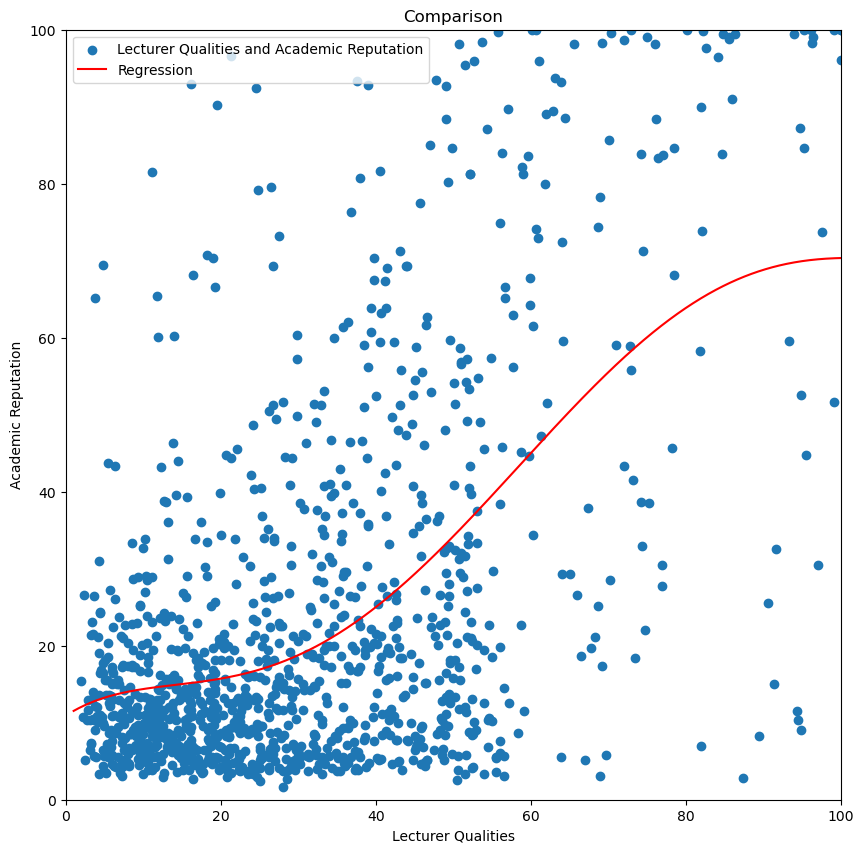

In [7]:
# Lecturers' Quality
prof_quality = (df[x] + df[y]) / 2

x = 'Lecturer Qualities'
y = 'Academic Reputation'
draw_scatter_plot(prof_quality, df[y], x, y, 100, 100, 'Comparison', x + ' and ' + y, 5)

Dựa vào dữ liệu đã có, ta có thể dự đoán được việc chất lượng giảng viên có ảnh hưởng đến danh tiếng học thuật của trường theo chiều thuận, ngoài ra có những yếu tố khác ảnh hưởng đến danh tiếng học thuật của trường nhưng không được nhắc đến trong câu hỏi này.

Relation between Schools' Lecturers' Quality and Schools' Sustainability:

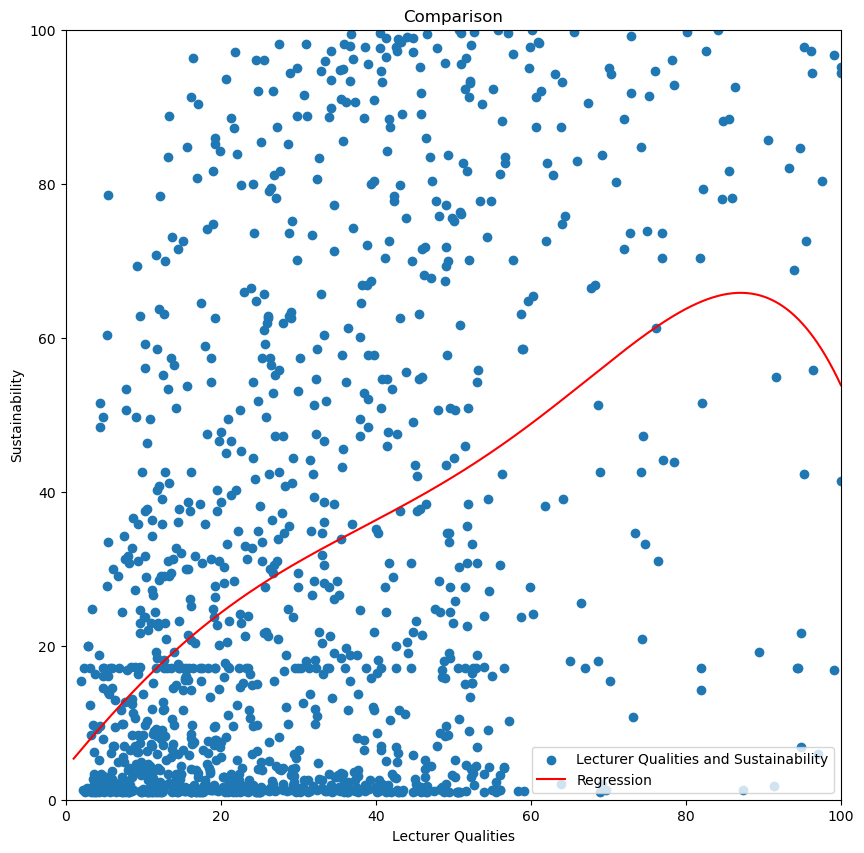

In [8]:
y = 'Sustainability'
draw_scatter_plot(prof_quality, df[y], x, y, 100, 100, 'Comparison', x + ' and ' + y, 5)

Dựa vào dữ liệu đã có, ta có thể chất lượng giảng viên có quan hệ mật thiết với độ cam kết và thành công của trường. Ngoài ra còn có các yếu tố khác dẫn đến sự cam kết và thành công của trường nhưng không có dữ liệu để cân nhắc trong câu hỏi này.

Kết luận:
    Ngoài những yếu tố phụ, yếu tố đội ngũ giảng viên là một trpng những yếu tố quyết định Danh tiếng của trường và Độ thành công của trường đại học. Trong đó, một số yếu tố quyết định giảng viên chất lượng là lượng nghiên cứu được công nhận và sức chịu đựng áp lực của giảng viên.

Ý nghĩa của câu hỏi: Đưa ra một vài gợi ý cho các trường đại học trong việc nâng cao danh tiếng và mức thành công của trường.
    